<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/Week_1/Regression_Automobile/Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Automobile.csv to Automobile (4).csv


In [ ]:
import pandas as pd

df = pd.read_csv('Automobile.csv')

print(df.head())

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \

INFO DATASET SEBELUM DROPNA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16

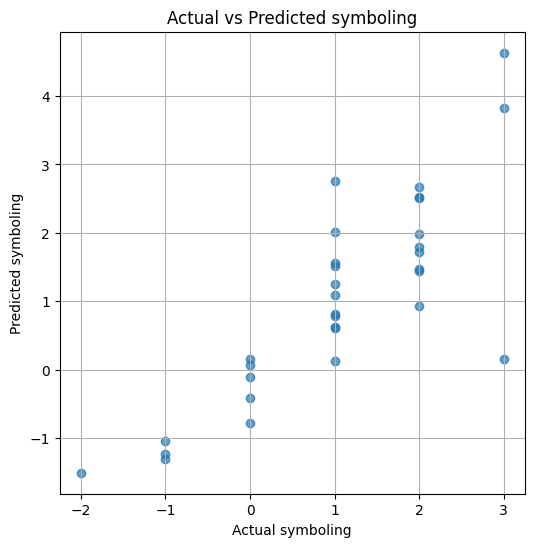


KOEFISIEN MODEL
Koefisien: [-9.76041101e-06  5.83101459e-02 -7.58015808e-02  2.02627158e-04
 -1.99817490e-03  2.59524886e-01 -3.44435152e-01  4.47640524e-01
  8.89519870e-03  1.52898883e-01 -4.51635087e-04 -1.12666979e-01
  1.71408035e-02 -1.97732435e-02 -2.34942873e-02 -2.72685288e-01
  8.84147857e-03  1.05826774e+00 -1.34845165e+00  1.11921583e-12
  7.91234725e-01  4.25474545e-01  5.84737525e-01 -2.72872114e-01
 -1.07993277e+00 -4.21226246e-01 -4.49676095e-01 -3.08146645e-01
 -8.45973018e-01 -1.11603395e+00 -1.43273611e+00 -8.88008139e-01
  6.22460216e-01  1.34845165e+00 -2.07272212e+00 -1.83313018e+00
 -2.12282279e+00 -9.26525366e-01 -1.40776204e+00 -1.34376443e+00
 -1.60843436e+00 -1.20998726e+00 -1.39845847e+00 -1.91090644e+00
 -1.82993068e+00 -1.34417742e+00  8.25400565e-01 -1.07993277e+00
 -1.51686307e+00  8.12535094e-01 -2.34921932e+00]
Intercept: 8.24140120637161


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn

# Load dataset
df = pd.read_csv('Automobile.csv')

# Menampilkan info dataset sebelum menghapus NaN
print("="*40)
print("INFO DATASET SEBELUM DROPNA")
print("="*40)
print(df.info())

# Mengecek missing values
print("\n" + "="*40)
print("MISSING VALUES PER KOLOM SEBELUM DROPNA")
print("="*40)
print(df.isnull().sum())

# Menghapus baris yang memiliki NaN
df = df.dropna()

# Menampilkan info dataset setelah menghapus NaN
print("\n" + "="*40)
print("INFO DATASET SETELAH DROPNA")
print("="*40)
print(df.info())

# Mengecek ulang missing values setelah dropna
print("\n" + "="*40)
print("MISSING VALUES PER KOLOM SETELAH DROPNA")
print("="*40)
print(df.isnull().sum())

# Memilih fitur dan target
X = df.drop(columns=['symboling'])  # Menghapus kolom target dari fitur
y = df['symboling']

# Mengubah data kategori menjadi numerik
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*40)
print("EVALUASI MODEL")
print("="*40)
print(f'MSE      : {mse:.4f}')
print(f'RMSE     : {rmse:.4f}')
print(f'R-squared: {r2:.4f}')

# Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual symboling')
plt.ylabel('Predicted symboling')
plt.title('Actual vs Predicted symboling')
plt.grid(True)
plt.show()

# Menampilkan koefisien model
print("\n" + "="*40)
print("KOEFISIEN MODEL")
print("="*40)
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


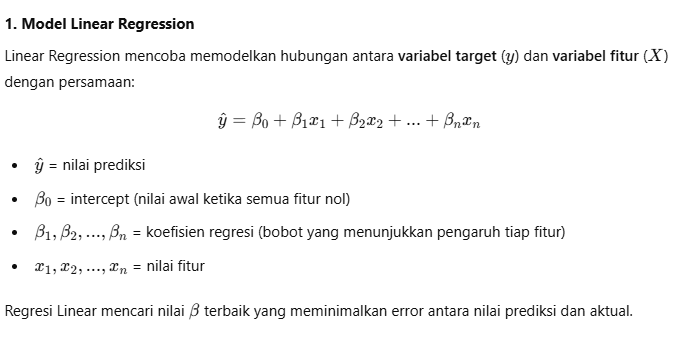

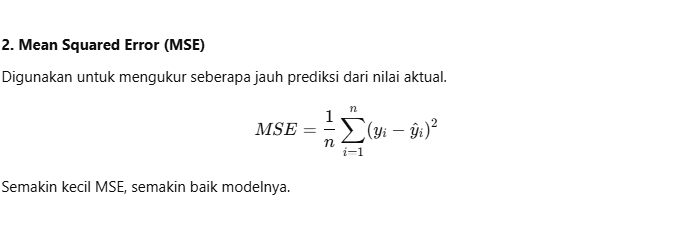

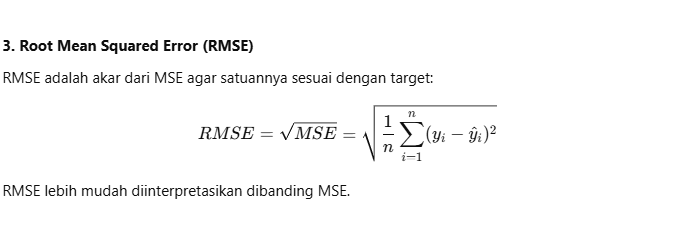

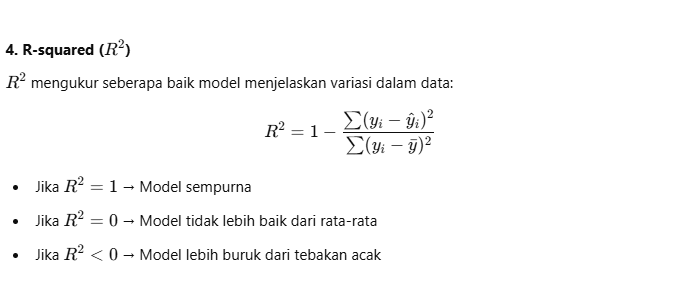

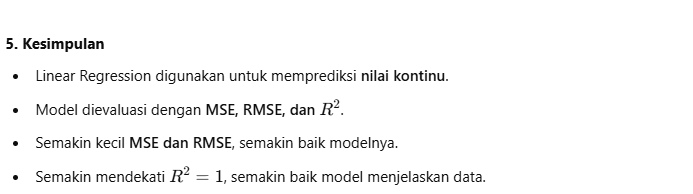